In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os


In [79]:
path=(r"C:/Users/USER/OneDrive/Documents/SalesAnalysis/Sales_Data")

In [80]:
def read_multiple_csv(path):
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    dataframes = {}

    for csv_file in csv_files:
        dataframes[csv_file] = pd.read_csv(os.path.join(path, csv_file))

    return dataframes

In [81]:
dataframes = read_multiple_csv(path)
dataframes

{'Sales_April_2019.csv':       Order ID                     Product Quantity Ordered Price Each  \
 0       176558        USB-C Charging Cable                2      11.95   
 1          NaN                         NaN              NaN        NaN   
 2       176559  Bose SoundSport Headphones                1      99.99   
 3       176560                Google Phone                1        600   
 4       176560            Wired Headphones                1      11.99   
 ...        ...                         ...              ...        ...   
 18378   194090                Google Phone                1        600   
 18379   194091       AA Batteries (4-pack)                1       3.84   
 18380   194092      AAA Batteries (4-pack)                2       2.99   
 18381   194093       AA Batteries (4-pack)                1       3.84   
 18382   194094    Lightning Charging Cable                1      14.95   
 
            Order Date                        Purchase Address  
 0      0

In [82]:
data = pd.concat(dataframes, ignore_index=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [83]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [84]:
# to find total nan in data
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [85]:
# drop nans

data=data.dropna(how='all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [87]:
# lets convert the columns to the right datatype

data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_9388\3727498510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce')


In [88]:
data['Quantity Ordered'].info()

<class 'pandas.core.series.Series'>
Index: 186305 entries, 0 to 186849
Series name: Quantity Ordered
Non-Null Count   Dtype  
--------------   -----  
185950 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


In [89]:
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_9388\465893679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce')


In [90]:
data['Price Each'].info()

<class 'pandas.core.series.Series'>
Index: 186305 entries, 0 to 186849
Series name: Price Each
Non-Null Count   Dtype  
--------------   -----  
185950 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


In [91]:
data.isna().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address      0
dtype: int64

In [92]:
#data['Price Each'].isna().sum()


data['Price Each']=data['Price Each'].fillna(method='ffill')


C:\Users\USER\AppData\Local\Temp\ipykernel_9388\4107334886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=data['Price Each'].fillna(method='ffill')


In [93]:
data['Price Each']=data['Price Each'].astype('float32').astype('int32')


data['Price Each'].info()

<class 'pandas.core.series.Series'>
Index: 186305 entries, 0 to 186849
Series name: Price Each
Non-Null Count   Dtype
--------------   -----
186305 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


C:\Users\USER\AppData\Local\Temp\ipykernel_9388\2685683230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=data['Price Each'].astype('float32').astype('int32')


In [94]:
data['Price Each'].info()

<class 'pandas.core.series.Series'>
Index: 186305 entries, 0 to 186849
Series name: Price Each
Non-Null Count   Dtype
--------------   -----
186305 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


In [95]:
data.isna().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each            0
Order Date            0
Purchase Address      0
dtype: int64

In [96]:
data=data.dropna(how='all',axis=1)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        186305 non-null  int32  
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


In [98]:
data['Quantity Ordered']=data['Quantity Ordered'].fillna(method='ffill')

### to create a city column


In [99]:
data[['Street no','City','Zip code']]=data['Purchase Address'].str.split(',',expand=True)
data[['Street no','City','Zip code']]



,Street no,City,Zip code
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001
...,...,...,...
186845,840 Highland St,Los Angeles,CA 90001
186846,216 Dogwood St,San Francisco,CA 94016
186847,220 12th St,San Francisco,CA 94016
186848,511 Forest St,San Francisco,CA 94016


In [112]:
## get month column


data['month']=data['Order Date'].str[0:2]
data['month']
# change datatype to int32
data['month']=pd.to_numeric(data['month'],errors='coerce')


data['month']=data['month'].fillna(method='ffill')

data['month']=data['month'].astype('int32')

data['month'].info()

<class 'pandas.core.series.Series'>
Index: 186305 entries, 0 to 186849
Series name: month
Non-Null Count   Dtype
--------------   -----
186305 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


### create a sales column

In [101]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street no,City,Zip code,month
0,176558,USB-C Charging Cable,2.0,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001,4
2,176559,Bose SoundSport Headphones,1.0,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215,4
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4
4,176560,Wired Headphones,1.0,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4
5,176561,Wired Headphones,1.0,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001,4


In [102]:
data['sales']=data['Price Each'] * data['Quantity Ordered']

data['sales']

data['sales']=data['sales'].astype('int64')

In [103]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street no,City,Zip code,month,sales
0,176558,USB-C Charging Cable,2.0,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001,4,22
2,176559,Bose SoundSport Headphones,1.0,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215,4,99
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4,600
4,176560,Wired Headphones,1.0,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4,11
5,176561,Wired Headphones,1.0,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001,4,11


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  float64
 3   Price Each        186305 non-null  int32  
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Street no         186305 non-null  object 
 7   City              185950 non-null  object 
 8   Zip code          185950 non-null  object 
 9   month             186305 non-null  int32  
 10  sales             186305 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 15.6+ MB


In [141]:
data[['City','Zip code']]=data[['City','Zip code']].fillna('unknown')

#### what was the best month for sales

In [107]:
data.groupby(data['month'])

In [118]:
monthly_sales=data.groupby(data['month'])['sales'].sum()
monthly_sales

monthly_sales.sort_values(ascending=False)

month
12    4597121
10    3721487
4     3381765
11    3191023
5     3145421
3     2804470
7     2640708
6     2572307
8     2238509
2     2193973
9     2092153
1     1817437
Name: sales, dtype: int64

In [128]:
plt.style.use('ggplot')

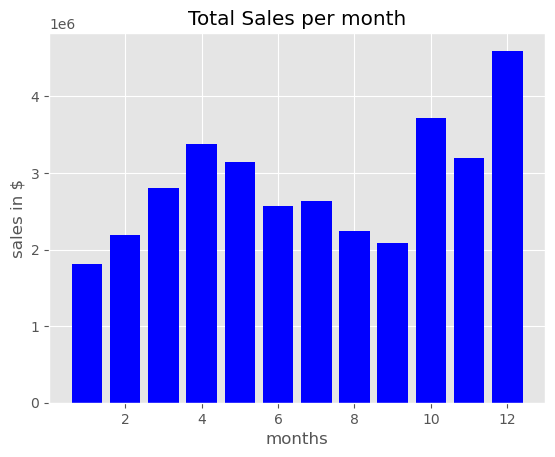

<Figure size 1000x1000 with 0 Axes>

In [180]:
months=range(1,13)

plt.bar(months,monthly_sales,color='blue')
plt.xlabel('months')
plt.ylabel('sales in $')
plt.title('Total Sales per month')

plt.figure(figsize=(10,10))

plt.show()

### total sales in each city and which cities with high sales

In [142]:
rdata=data[['Quantity Ordered','sales','City']]

In [143]:
rdata.groupby('City')

In [155]:
rdata.groupby('City').sum()

rrdata=rdata.groupby('City').sum().sort_values(by='sales',ascending=False)
rrdata

,Quantity Ordered,sales
City,,
San Francisco,50239.0,8223669
Los Angeles,33289.0,5426973
New York City,27932.0,4642872
Boston,22528.0,3644327
Atlanta,16602.0,2782841
Dallas,16730.0,2755117
Seattle,16553.0,2735070
Portland,14053.0,2309717
Austin,11153.0,1811054


In [164]:
# method 1
#cities= [City  for City,df in rdata.groupby('City')]

#plt.bar(cities,rrdata['sales'])
#plt.title('Total sales in cities')
#plt.ylabel('sales in $')
#plt.xlabel('cities')
#plt.xticks(rotation='vertical')


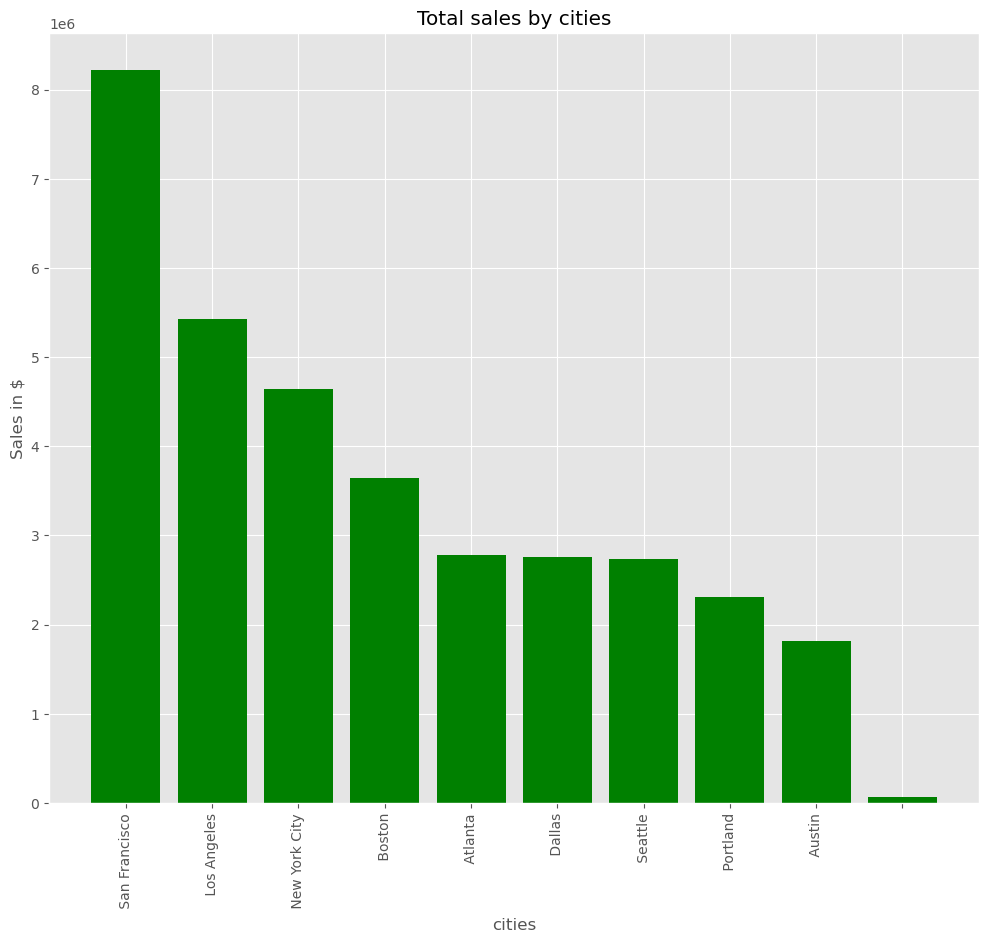

In [165]:
plt.figure(figsize=(12,10))

plt.bar(rrdata.index,rrdata['sales'],color='green')

plt.xlabel('cities')
plt.ylabel('Sales in $')
plt.title('Total sales by cities')
plt.xticks(rotation=90)

plt.show()

In [ ]:
### show products with most orders 

In [172]:
products=data.groupby('Product')
product_quantity=products['Quantity Ordered'].sum().sort_values(ascending=False)
product_quantity

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Product                         407.0
Name: Quantity Ordered, dtype: float64

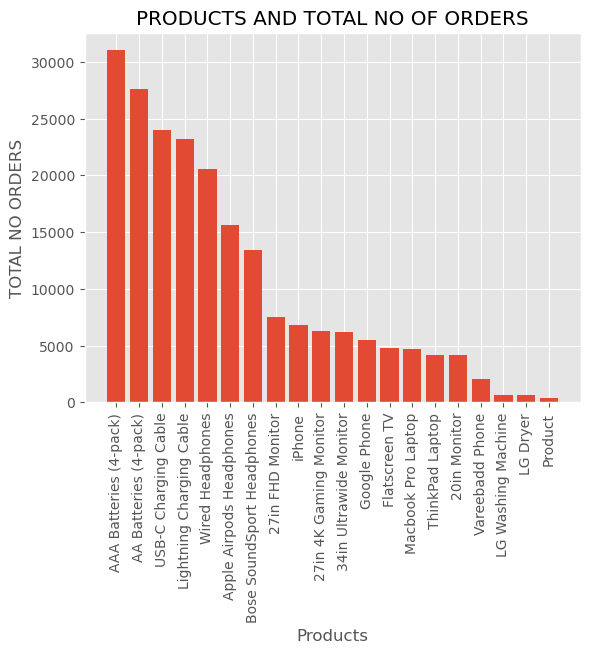

In [174]:
plt.bar(product_quantity.index,product_quantity)
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('TOTAL NO ORDERS')
plt.title('PRODUCTS AND TOTAL NO OF ORDERS')
plt.show()

### method 2

In [176]:
products=data.groupby('Product')
product_quantity=products['Quantity Ordered'].sum()
product_quantity

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                         407.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

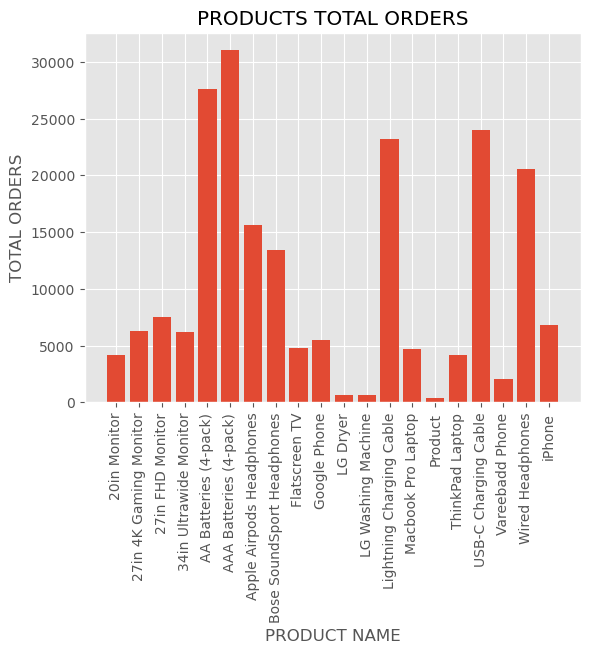

In [179]:
dproducts=[product for product,df in products]

plt.bar(dproducts,product_quantity)
plt.xticks(rotation=90)
plt.title('PRODUCTS TOTAL ORDERS')
plt.xlabel('PRODUCT NAME')
plt.ylabel('TOTAL ORDERS')

plt.show()